In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

from impedance.circuits import CustomCircuit
from impedance.plotting import plot_nyquist
from impedance import preprocessing
from impedance import validation

%reload_ext autoreload
%autoreload 2

## Start by simulating data for a circuit

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


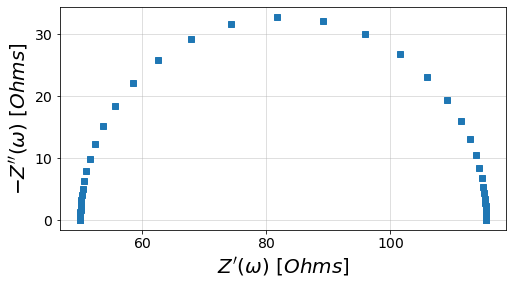

In [8]:
circ = 'R0-p(p(R1,C1), R1)' # ', G1)'

vals = [50, 1000, 1e-4, 70] #, 300, 1]

circuit = CustomCircuit(circ, initial_guess=vals)

sim_f = np.logspace(np.log10(1e5), np.log10(1e-3), num = 81)

# sim_Z = circuit.predict(sim_f, use_initial=True)
circuit.predict(sim_f, use_initial=True)

fig, ax0 = plt.subplots(figsize=(8,8))
# plot_nyquist(ax0, sim_Z)
circuit.plot(ax0, sim_f, circuit.predict(sim_f))
# circuit.plot(ax0, f_data=sim_f, Z_data=circuit.predict(sim_f))

## Now use built in Lin-KK function to evaluate validity

In [41]:
def get_tc_distribution(f, M):
    """ Returns the distribution of time constants for the linKK method """

    t_max = 1/np.min(f)
    t_min = 1/np.max(f)

    ts = np.zeros(shape=(M,))
    ts[0] = t_min
    ts[-1] = t_max
    if M > 1:
        for k in range(2, M):
            ts[k-1] = 10**(np.log10(t_min) +
                           ((k-1)/(M-1))*np.log10(t_max/t_min))

    ts *= 2*np.pi

    return ts

In [48]:
sim_KK = validation.linKK(sim_f, sim_Z)

In [32]:
# A function for plotting residuals would be useful

def plot_residuals(ax, freq, KK, **kwargs):
    """ Convenience function for plotting nyquist plots


        Parameters
        ----------
        ax: matplotlib.axes.Axes
            axes on which to plot the nyquist plot
        freq: np.array of floats
            frequencies
        KK: tuple
            output from using validation.linKK() function

        Returns
        -------
        ax: matplotlib.axes.Axes
    """
    if kwargs.get('fmt') is None:
        fmt = '.-'
    else:
        fmt = kwargs.get('fmt')

    if kwargs.get('lw') is None:
        lw = 3
    else:
        lw = kwargs.get('lw')

    ax.plot(freq, KK[3], '-', label=r'$\Delta_{\mathrm{Real}}$')
    ax.plot(freq, KK[4], '-', label=r'$\Delta_{\mathrm{Imag}}$')
    

    ax.set_title('Measurement Model Error M = ' + '%d' % KK[0] +
                 ' $\mu$ = ' + '%.3f' % KK[1] , fontsize=14)

    ax.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
    ax.set_xlabel('$f$ [Hz]', fontsize=14)
    ax.set_xscale('log')
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    # ax2.set_ylim(-.2, .2)
    ax.legend(loc=1, fontsize=14, ncol=2)
    vals = ax2.get_yticks()
    ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])
    plt.tight_layout()
    
    return ax

In [61]:
validation.fitLinKK(sim_f[:10], [.622, 1, 1.5], 3, sim_Z[:10])

(array([    50.        ,  30177.55018599, -23996.70019032, -34393.073125  ]),
 -0.934874532738939)

In [64]:
validation.eval_linKK([50, 100, 10, 20], [.622, .20, 1.5], sim_f)

array([ 50.00000005-2.24105037e-03j,  50.00000008-2.82131526e-03j,
        50.00000013-3.55182548e-03j,  50.00000021-4.47148335e-03j,
        50.00000033-5.62926400e-03j,  50.00000052-7.08682348e-03j,
        50.00000082-8.92178213e-03j,  50.0000013 -1.12318582e-02j,
        50.00000206-1.41400715e-02j,  50.00000326-1.78012950e-02j,
        50.00000517-2.24105021e-02j,  50.0000082 -2.82131493e-02j,
        50.000013  -3.55182482e-02j,  50.0000206 -4.47148203e-02j,
        50.00003264-5.62926138e-02j,  50.00005174-7.08681825e-02j,
        50.000082  -8.92177169e-02j,  50.00012996-1.12318373e-01j,
        50.00020597-1.41400300e-01j,  50.00032643-1.78012121e-01j,
        50.00051736-2.24103366e-01j,  50.00081995-2.82128192e-01j,
        50.00129952-3.55175894e-01j,  50.00205955-4.47135060e-01j,
        50.00326407-5.62899915e-01j,  50.00517295-7.08629507e-01j,
        50.00819793-8.92072793e-01j,  50.01299124-1.12297551e+00j,
        50.02058568-1.41358766e+00j,  50.03261596-1.77929288e+

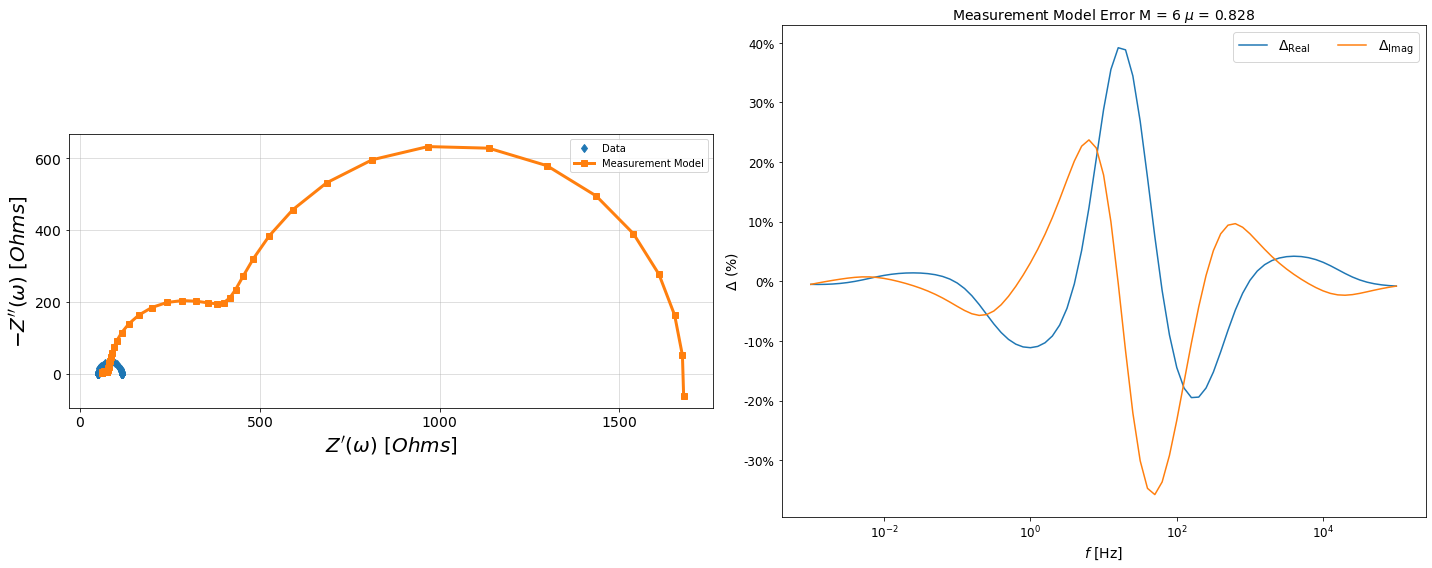

In [49]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,8))

plot_nyquist(ax0, sim_Z, fmt='d', label='Data')
plot_nyquist(ax0, KK[2], fmt='-s', label='Measurement Model')

ax0.legend()
plot_residuals(ax1, sim_f, sim_KK)

In [6]:
direc = r'\Data'
print(os.getcwd())
all_files=glob.glob(os.getcwd() + direc + '\*.par')
all_files.sort()

f_name=all_files[1]
print(f_name)
f0, Z0= preprocessing.readVersaStudio(f_name)

freqs, Z1 = preprocessing.ignoreBelowX(f0, Z0)

Z = Z1 - Z1[0]

C:\Users\shadd\OneDrive\Documents\Python\EIS
C:\Users\shadd\OneDrive\Documents\Python\EIS\Data\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par


(5, -0.0005882749616255012)


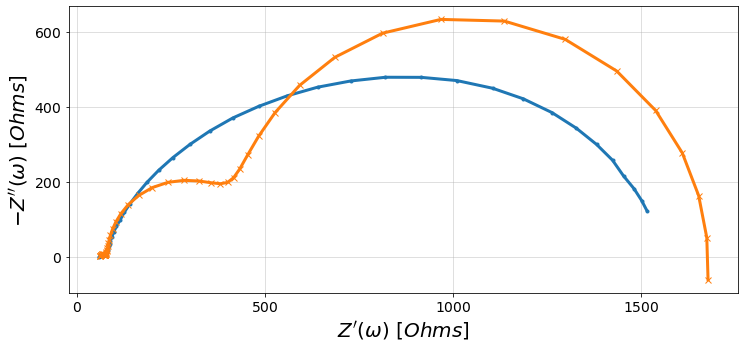

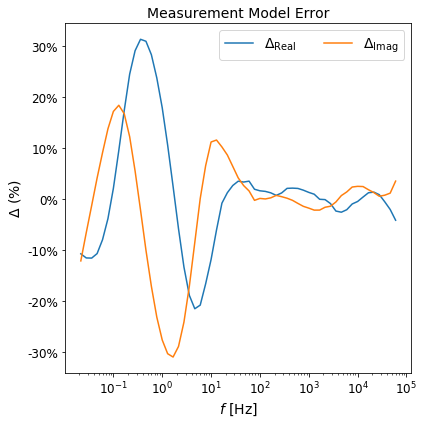

In [8]:
KK = validation.linKK(freqs, Z1)
print(KK[:2])
fig, ax0 = plt.subplots(ncols=1, figsize=(12,12))
fig2, ax2 = plt.subplots(ncols=1, figsize=(6,6))

plot_nyquist(ax0, Z1)
plot_nyquist(ax0, KK[2], fmt='-x')

# Plot residuals
ax2.plot(freqs, KK[3], '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(freqs, KK[4], '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Measurement Model Error', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
# ax2.set_ylim(-.2, .2)
ax2.legend(loc=1, fontsize=14, ncol=2)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])
plt.tight_layout()

plt.show()

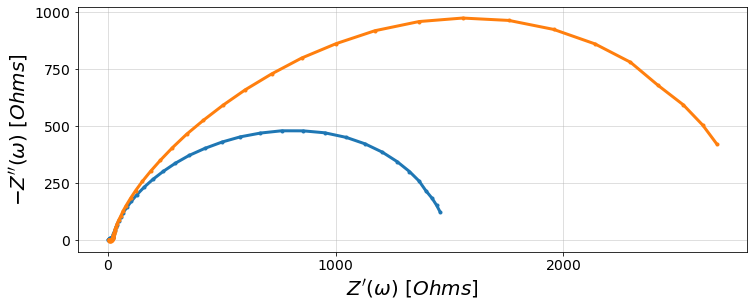

In [731]:
B_fit = IC.par_RC_subtract_log([3.5, -5.8429], freqs[1:], Z[1:])

fig, ax0 = plt.subplots(figsize=(12,12))

plot_nyquist(ax0, freqs, Z)
plot_nyquist(ax0, freqs[1:], B_fit)


In [792]:
direc = r'D:\UW Research\fr-XAS July 2018\Data\Versastat'

all_files=glob.glob(direc + '\*1%_EIS*.par')
all_files.sort()

all_files

['D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2_Test.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_n100mV.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_n140mV.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_n150mV.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_n50mV.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_p100mV.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_p150mV.par',
 'D:\\UW Research\\fr-XAS July 2018\\Data\\Versastat\\LSC_DPB1_FRXAS_700C_1%_EIS_p50mV.par']

In [841]:
fs = []
Zs = []

for f_name in all_files:
    f0, Z0 = preprocessing.readVersaStudio(f_name)
    
    fi, Zi = preprocessing.ignoreBelowX(f0, Z0)
    
    fs.append(fi)
    Zs.append(Zi)

In [850]:
KKs = []

for i, (fi,Zi) in enumerate(zip(fs, Zs)):
    print(all_files[i])
    KKi = validation.linKK(fi, Zi, c=None, max_M=12)
    KKs.append(KKi)

D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2_Test.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_n100mV.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_n140mV.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_n150mV.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_n50mV.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_p100mV.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_p150mV.par
D:\UW Research\fr-XAS July 2018\Data\Versastat\LSC_DPB1_FRXAS_700C_1%_EIS_p50mV.par


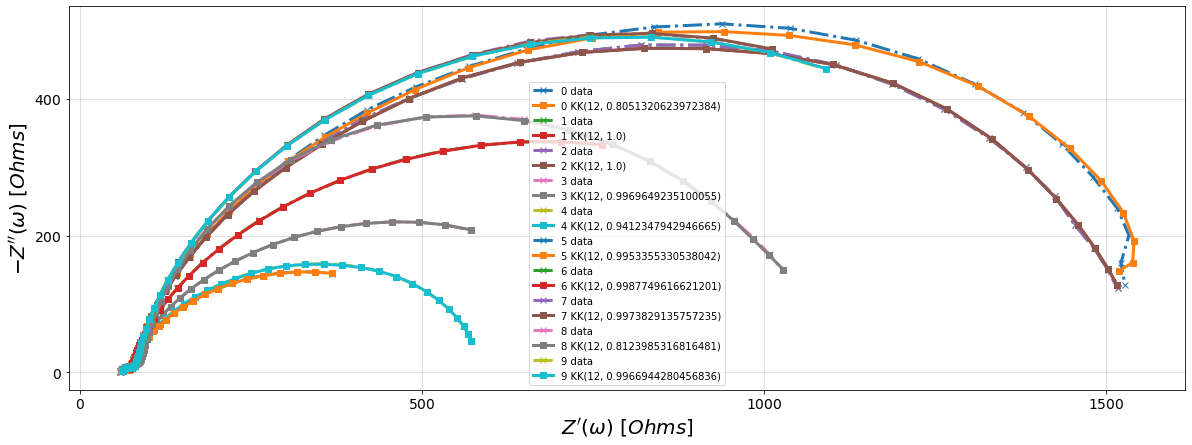

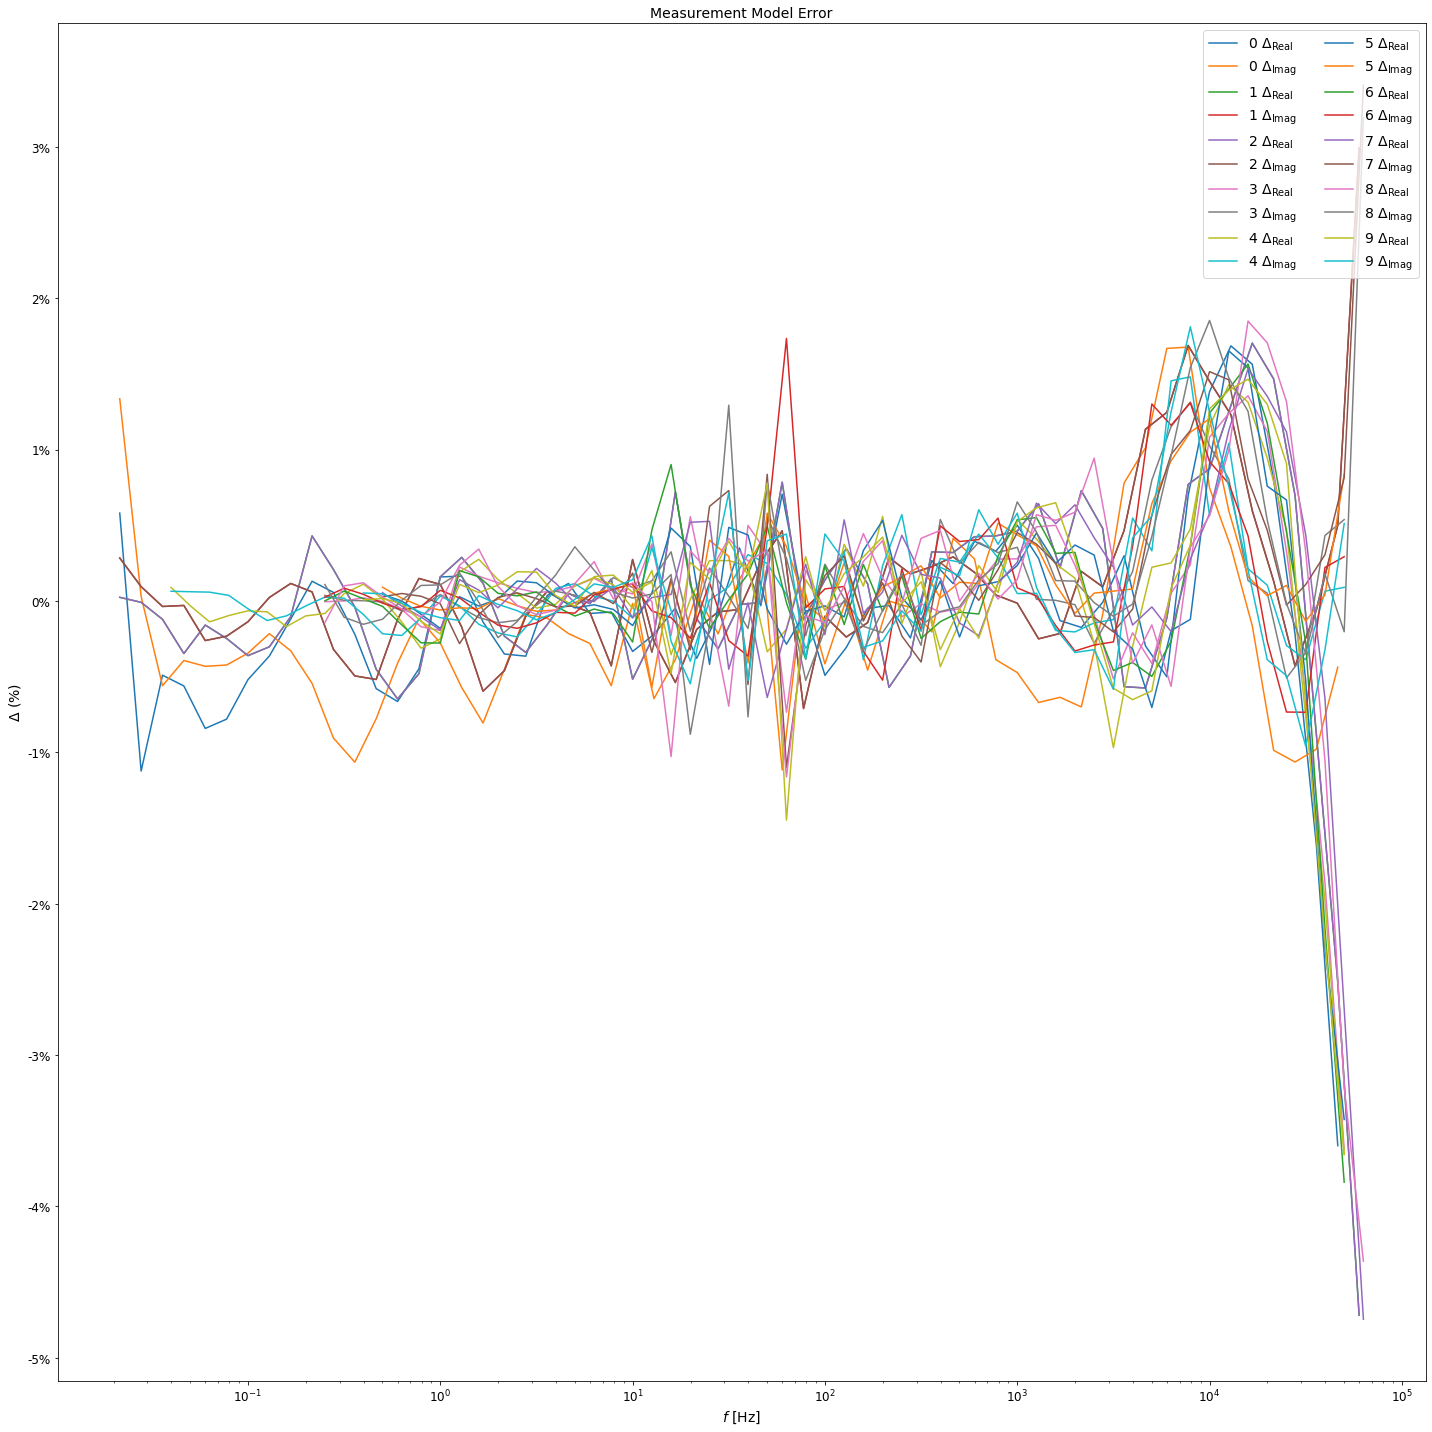

In [851]:
fig, ax0 = plt.subplots(figsize=(20,20))
fig2, ax2 = plt.subplots(figsize=(20,20))

for i, (fi,Zi) in enumerate(zip(fs, Zs)):
    plot_nyquist(ax0, fi, Zi, fmt='-.x', label= str(i)+' data')
    plot_nyquist(ax0, fi, KKs[i][2], fmt='-s', label=str(i)+' KK' + str(KKs[i][:2]))
    ax2.plot(fi, KKs[i][3], '-', label=str(i) + r' $\Delta_{\mathrm{Real}}$')
    ax2.plot(fi, KKs[i][4], '-', label=str(i) + r' $\Delta_{\mathrm{Imag}}$')

ax0.legend()


ax2.set_title('Measurement Model Error', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
# ax2.set_ylim(-.2, .2)
ax2.legend(loc=1, fontsize=14, ncol=2)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])
plt.tight_layout()

plt.show()

In [825]:
N = 10
circuit = 'R_0'
initial_guess = [.015]
for i in range(N):
    circuit += f'-p(R_{i % 9 + 1},C_{i % 9 + 1})'
    initial_guess.append(.03/N)
    initial_guess.append(10**(3 - 6*i/N))

meas_model = CustomCircuit(initial_guess=initial_guess, circuit=circuit)


In [853]:
meas_model.fit(fs[0], Zs[0])

KeyboardInterrupt: 

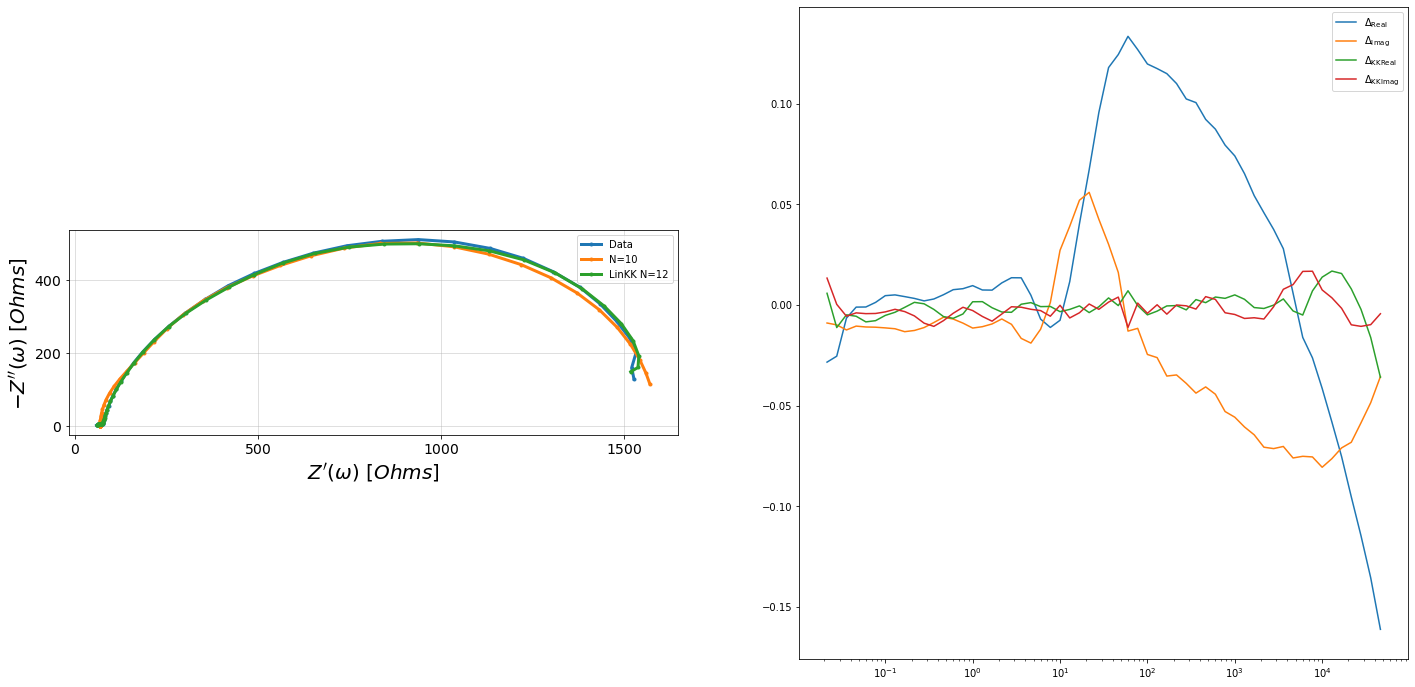

In [854]:
res_meas_real = (Zs[0] - meas_model.predict(fs[0])).real/np.abs(Zs[0])
res_meas_imag = (Zs[0] - meas_model.predict(fs[0])).imag/np.abs(Zs[0])

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(24,12))

plot_nyquist(ax0, fs[0], Zs[0], label='Data')
plot_nyquist(ax0, fs[0], meas_model.predict(fs[0]), label='N=10')
plot_nyquist(ax0, fs[0], KKs[0][2], label='LinKK N='+str(KKs[0][0]))
ax0.legend()


ax1.plot(fs[0], res_meas_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax1.plot(fs[0], res_meas_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax1.plot(fs[0], KKs[0][3], '-', label=r'$\Delta_{\mathrm{ KK Real}}$')
ax1.plot(fs[0], KKs[0][4], '-', label=r'$\Delta_{\mathrm{ KK Imag}}$')

ax1.set_xscale('log')
ax1.legend()

plt.show()